## Lecture-03 Gradient Descent and Dymanic Programming

####  Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

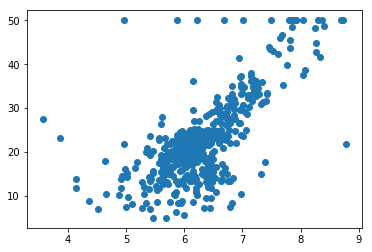

In [1]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
data = load_boston()
x,y = data['data'], data['target']
%matplotlib inline
plt.scatter(x[:,5],y)

In [2]:
print(type(x))

<class 'numpy.ndarray'>


In [3]:
def price(rm, k, b):
    '''f(x) = k*x + b'''
    return k*rm +b

In [4]:
def loss_abs(y, y_hat):
    '''Loss = |y - y_hat| '''
    l = [abs(y_i-y_hat_i) for y_i,y_hat_i in zip(list(y), list(y_hat))]
    #print(l)
    return sum(l)/(len(list(y)))

In [17]:
import random
current_k = random.random() * 100 - 50
current_b = random.random() * 100 - 50
price_by_k_and_b = [price(r,current_k,current_b) for r in x[:,5]] 
current_loss_abs = loss_abs(y, price_by_k_and_b)
current_loss_squ = loss_squ(y, price_by_k_and_b)
print(current_loss_abs)
print(current_loss_squ)

116.18786889875452
13815.020985295332


In [16]:
def loss_squ(y, y_hat):
    return sum((y_i-y_hat_i)**2 for y_i,y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [18]:
def partial_k(x, y, y_hat):
    
    n = len(y)
    gradient = 0
    for x_i, y_i,y_hat_i in zip(list(x),list(y),list(y_hat)):
        if y_i >= y_hat_i:
            gradient += x_i
            return (-1/n)*gradient
        else:
            gradient += x_i
            return (1/n)*gradient

In [19]:
def partial_b(x, y, y_hat):
    
    n = len(y)
    
    for  y_i,y_hat_i in zip(list(y),list(y_hat)):
        if y_i >= y_hat_i:
            return (-1/n)
        else:
            return (1/n)

In [32]:
import random
trying_times = 10000
x_rm = x[:,5]

min_loss = float('inf')
current_k = random.random() * 100 - 50
current_b = random.random() * 100 - 50



learning_rate = 0.4
for i in range(trying_times):
    
    price_by_k_and_b = [price(r,current_k,current_b) for r in x_rm] 
    
    #current_loss = loss_abs(y, price_by_k_and_b)
    current_loss = loss_squ(y, price_by_k_and_b)
    k_gradient = partial_k(x_rm, y, price_by_k_and_b)
    
    b_gradient = partial_b(x_rm, y, price_by_k_and_b)
    
    #ic(type(y))
    
    
    
    if current_loss < min_loss: #perform better
        min_loss = current_loss
        
        if i %1000 == 0:
            
            print('tims:{}, min_loss:{}, best_k:{}, best_b:{}'.format(i, min_loss, current_k, current_b))
        
    k_gradient = partial_k(x_rm, y, price_by_k_and_b)
    #print(k_gradient)
    b_gradient = partial_b(x_rm, y, price_by_k_and_b)
    #print(b_gradient)
    current_k = current_k - k_gradient * learning_rate
    current_b = current_b - b_gradient * learning_rate
    #print(current_k)
print(' min_loss:{}, best_k:{}, best_b:{}'.format( min_loss, current_k, current_b))

tims:0, min_loss:32116.760693632918, best_k:35.25624833525505, best_b:-20.89343117163345
tims:1000, min_loss:21195.374408509386, best_k:30.058619876758357, best_b:-21.683945005624206
tims:2000, min_loss:12539.17762852078, best_k:24.860991418261662, best_b:-22.474458839614964
tims:3000, min_loss:6148.170353667047, best_k:19.663362959764967, best_b:-23.264972673605723
tims:4000, min_loss:2022.3525839479123, best_k:14.465734501267747, best_b:-24.05548650759648
tims:5000, min_loss:161.72431936395094, best_k:9.268106042769276, best_b:-24.84600034158724
 min_loss:44.72925790627177, best_k:7.469726596128896, best_b:-25.11951812814804


### 这里随机初始k b ，导致可能会收敛到一些局部解，多运行几次找到全局最优解

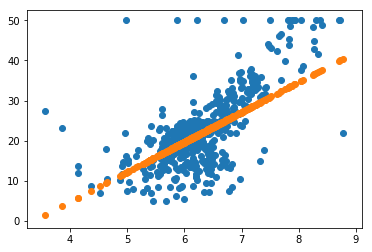

In [35]:
k = 7.469726596128896
b = -25.11951812814804
price_by_random_k_and_b = [price(r,k, b) for r in x_rm]


plt.scatter(x_rm, y)
plt.scatter(x_rm, price_by_random_k_and_b)

## Part 3: Finish the Solution Parse Part of Edit-Distance

In [36]:
solution = {}

In [37]:
def edit_distance(string1, string2):
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),  # string 1 delete tail
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),  # string 1 add tail of string2
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))

    candidates.append(both_forward)
    
    min_distance, operation = min(candidates, key=lambda x: x[0])
    
    solution[(string1, string2)] = operation 
    
    #print(string1,string2,candidates)
    return min_distance

In [38]:
solution = {}
edit_distance('ABC', 'B')

2

In [39]:
solution

{('A', 'B'): 'SUB A => B', ('AB', 'B'): '', ('ABC', 'B'): 'DEL C'}

In [54]:
edit_distance('ACF', 'ABE')

2

In [67]:
list(solution.items())[0:5]

[(('c', 'c'), ''),
 (('c', 'c1'), 'ADD 1'),
 (('c', 'c12'), 'ADD 2'),
 (('c', 'c128'), 'ADD 8'),
 (('c', 'c128C'), 'ADD C')]

In [56]:
print(type(solution[('A','A')]))

<class 'str'>


In [57]:
operation = []
def parse_edit_distance(string1, string2):
    '''operation : the steps string1 needs to take to transform into string2'''
    global operation
    if not string1: return string2
    if not string2: return string1
    
    
    operation.append(solution[(string1, string2)])
    
    if len(string1) < len(string2):
        return parse_edit_distance(string1[:], string2[:-1])
    elif len(string1) > len(string2):
        return parse_edit_distance(string1[:-1], string2[:])
    else:
        return parse_edit_distance(string1[:-1], string2[:-1])

In [58]:
#test 1  len(s1) = len(s2)
s1 = 'ABCD'
s2 = 'ABEF'

solution = {}
edit_distance(s1,s2)
operation = []
parse_edit_distance(s1,s2)

''

In [59]:
operation

['SUB D => F', 'SUB C => E', '', '']

In [60]:
#s1 = 'ABCD'
#s2 = 'ABEF'
operation

['SUB D => F', 'SUB C => E', '', '']

In [61]:
#test 1  len(s1) > len(s2)
s1 = '13579'
s2 = '1346'

solution = {}
edit_distance(s1,s2)
operation = []
parse_edit_distance(s1,s2)

''

In [62]:
#test 1  len(s1) < len(s2)
s1 = '139'
s2 = '13454'

solution = {}
edit_distance(s1,s2)
operation = []
parse_edit_distance(s1,s2)

''

In [63]:
operation

['ADD 4', 'ADD 5', 'SUB 9 => 4', '', '']

In [64]:
#test 1  len(s1) < len(s2)
s1 = 'c129'
s2 = 'c128CD'

solution = {}
edit_distance(s1,s2)
operation = []
parse_edit_distance(s1,s2)

''

In [65]:
operation

['ADD D', 'ADD C', 'SUB 9 => 8', '', '', '']

## Part 5-1: review machine learning

#### 1.Why do we use Derivative / Gredient to fit a target function?  
  
Ans:Because we can give some directions to the target function(usually the Loss function). So that the target function can converge rapidly.

#### 2.In the words 'Gredient Descent', what's the Gredient and what's the Descent?  
  
Ans: The gradient is a multi-variable generalization of the derivative.Descent means to take steps proportional to the negative of the gradient, and find the local minimum.

#### 3.What's the advantages of the 3rd gradient descent method compared to the previous methods?  
  
Ans:The 1st method don't have directions, it takes lots of resources to get the proper k and b.  
The 2nd way has directions but not always the right one.  
After all, the 3rd method, has a clear direction and move on effiently.

#### 4.Using the simple words to describe: What's the machine leanring.  
  
Ans:  automatic; data analysis

## Part 5: Answer following questions:

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked search problme?  

Ans: a.Dynamic Programming can solve complex problems which consists of overlapping subproblems.  
b.Search problem contains different nodes needed to be visited while dynamic programming contains some overlapping nodes(subproblems).  
3. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the right answer based on inputs?  

Ans:In my opinion, both method are able to solve problem. The point is dynamic programming is more suitable to solve problems with clear and fewer inputs. In contrast, ML do better when dealing with big data(large inputs).
4. Can you catch up at least 3 problems which could solved by Dynamic Programming?  

Ans:1.Cutting Length 2.Edit Distance 3.Fibonacci sequence
Can you catch up at least 3 problems wich could sloved by Edit Distance?  
Ans:1.拼写联想 2.拼写检查 3.数字匹配  
5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature.  

Ans: 1.Overlapping Subproblems. The problem can be divided into overlapping subproblems
2.Overlapping computing saved in a table. We can solve subproblems and stored it in a table.
3.Parsing Solution. Solution is the table we need to look up so that the problem is solved.
6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)  

Ans:1.No general formation of Dynamic Program is available; every problem has to be solving in its own way.
2.Dividing problem in sub problem and storing inter mediate results consumes memory.  
Quoted from Quora [https://www.quora.com/What-are-the-advantages-and-disadvantages-of-dynamic-programming]

## Part 6 Preparation of Project-01
Using python Flask or Bottle to finish your first simple web app:

https://bottlepy.org/

Learn what's the SQL, and try some simple SQL operations:

https://www.w3schools.com/sql/sql_intro.asp

Learn what's the HTML ( ONLY need to know the basic things)

https://getbootstrap.com/; https://www.w3schools.com/html/